Faces found: 1
Face locations: [(38, 146, 113, 71)]
Dataset classes: ['elondataset', 'elondataset', 'elondataset', 'elondataset', 'elondataset', 'elondataset', 'elondataset', 'elondataset', 'elondataset', 'inshtindataset', 'inshtindataset', 'inshtindataset', 'inshtindataset', 'inshtindataset', 'inshtindataset', 'inshtindataset', 'inshtindataset', 'inshtindataset', 'inshtindataset', 'magdydataset', 'magdydataset', 'magdydataset', 'magdydataset', 'magdydataset', 'magdydataset', 'magdydataset', 'magdydataset', 'magdydataset', 'moustafadataset', 'moustafadataset', 'moustafadataset', 'moustafadataset', 'moustafadataset', 'moustafadataset', 'moustafadataset', 'moustafadataset', 'moustafadataset', 'moustafadataset', 'zwieldataset', 'zwieldataset', 'zwieldataset', 'zwieldataset', 'zwieldataset', 'zwieldataset', 'zwieldataset', 'zwieldataset', 'zwieldataset', 'zwieldataset', 'zwieldataset']
Number of encodings: 49


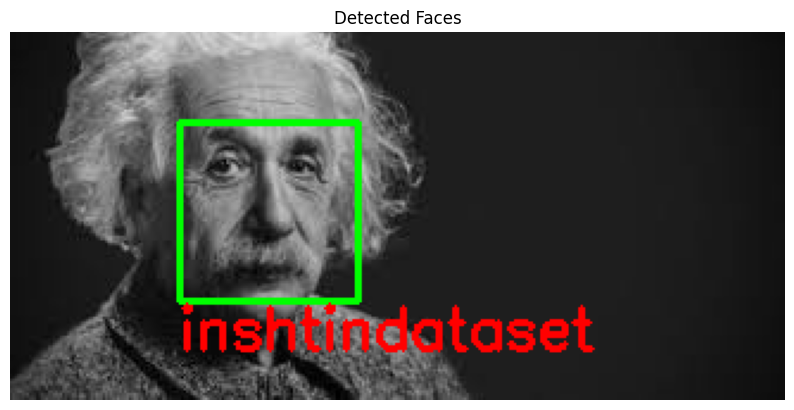

In [3]:
import face_recognition
import cv2
import matplotlib.pyplot as plt
import os

# -----------------------------
# Detect faces in a single test image
img = cv2.imread("E:/PatternProject/flask/test/10.jfif")  # ضع هنا مسار الصورة التي تريد اختبارها
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Find faces in the image
face_locations = face_recognition.face_locations(img_rgb)
print(f"Faces found: {len(face_locations)}")
print(f"Face locations: {face_locations}")

# -----------------------------
# Load the dataset and encode the faces
train_path = os.path.join("dataset")  # مسار البيانات الخاصة بك
train_encodes = []
train_classes = []

# Iterate through all people in the dataset
for person_name in os.listdir(train_path):
    person_folder = os.path.join(train_path, person_name)
    
    if not os.path.isdir(person_folder):
        continue  # skip if it's not a folder

    for image_name in os.listdir(person_folder):
        image_path = os.path.join(person_folder, image_name)

        img_person = cv2.imread(image_path)
        img_person_rgb = cv2.cvtColor(img_person, cv2.COLOR_BGR2RGB)

        # Find the face encodings in the image
        encodings = face_recognition.face_encodings(img_person_rgb)
        if encodings:
            train_encodes.append(encodings[0])  # Save the encoding of the face
            train_classes.append(person_name)  # Save the person's name

print(f"Dataset classes: {train_classes}")
print(f"Number of encodings: {len(train_encodes)}")

# -----------------------------
# Testing image: detect each face separately
if len(face_locations) > 0:
    test_encodings = face_recognition.face_encodings(img_rgb, face_locations)

    for (top, right, bottom, left), img_encoding in zip(face_locations, test_encodings):
        # Compare with stored encodings in the dataset
        results = face_recognition.compare_faces(train_encodes, img_encoding)
        face_name = "Unknown"

        # If a match is found, get the corresponding name
        face_distances = face_recognition.face_distance(train_encodes, img_encoding)
        if len(face_distances) > 0:
            best_match_index = face_distances.argmin()
            if results[best_match_index]:
                face_name = train_classes[best_match_index]

        # Draw a rectangle around the face
        cv2.rectangle(img_rgb, (left, top), (right, bottom), (0, 255, 0), 2)
        
        # Write the name under the rectangle
        cv2.putText(img_rgb, face_name, (left, bottom + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# Display the result
plt.figure(figsize=(10, 8))
plt.axis("off")
plt.title(f"Detected Faces")
plt.imshow(img_rgb)
plt.show()
